# Emission line galaxies - classification

Classifications of emission-line galaxies using SDSS database in combination with WISE database.
Notebook adopted from project work by Ridha Fathima Mohideen Malik, developed under supervision of Dragana Ilic, Isidora Jankov within MASS master program.

For AGN diagnostics using different selection criteria, please see also https://sites.google.com/site/agndiagnostics/agn-optical-line-diagnostics?authuser=0

In [1]:
#!pip install astroquery

In [2]:
# imports

import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib
import matplotlib.pyplot as plt

from astroquery.sdss import SDSS

#References
#https://docs.scipy.org/doc/scipy/reference/stats.html
#https://pandas.pydata.org/docs/index.html
#https://astroquery.readthedocs.io/en/latest/
#https://astroquery.readthedocs.io/en/latest/sdss/sdss.html


In [3]:
# If you do not have some of the above packages, install them e.g. using pip
# !pip install astroquery

## TASK 1 - BPT \& WHAN diagrams

In [4]:
# sdss query through astropy - https://www.astropy.org

# https://astroquery.readthedocs.io/en/latest/
# https://astroquery.readthedocs.io/en/latest/api/astroquery.sdss.SDSSClass.html#astroquery.sdss.SDSSClass.query_sql

with open('query_task1.txt', 'r') as file:
    query = file.read().replace('\n', ' ') ## input is a single string

results = SDSS.query_sql(query, timeout=500, data_release=18).to_pandas()

results.to_csv('nlr.csv', sep=',')

/home/damir/.local/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [5]:
# our data

gal = pd.read_csv('nlr.csv', sep=',', index_col=0)
gal

,plate,mjd,fiberid,class,subclass,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,h_alpha_eqw,nii_6584_eqw
0,266,51602,201,b'GALAXY',b'',0.147300,1548.97400,424.30760,1680.56800,228.50380,-417.174100,-61.573730
1,266,51602,323,b'GALAXY',b'STARBURST',0.088867,427.02320,100.01250,66.02779,99.72473,-54.077300,-12.981590
2,266,51602,401,b'GALAXY',b'STARBURST',0.051580,3334.86300,953.79440,2399.14700,441.74460,-197.881700,-26.184730
3,267,51608,245,b'GALAXY',b'STARFORMING',0.019468,60.90096,15.58486,21.52299,16.08556,-21.233380,-5.745538
4,268,51633,1,b'GALAXY',b'STARBURST',0.068742,878.33650,256.40540,610.96890,114.44820,-147.244200,-19.049310
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,412,52235,273,b'GALAXY',b'STARFORMING',0.037427,156.66130,44.17141,54.00223,21.12533,-29.637500,-4.370995
29996,412,52250,319,b'GALAXY',b'STARBURST',0.028692,2583.82400,715.55100,417.28250,960.34470,-42.589870,-15.702820
29997,412,52258,319,b'GALAXY',b'STARFORMING',0.029391,169.48020,50.14524,73.86210,27.52894,-30.869590,-4.797718
29998,412,52258,386,b'GALAXY',b'STARFORMING',0.087781,210.84630,54.69152,31.65290,59.43869,-34.535880,-9.890243


In [6]:
gal.describe()

,plate,mjd,fiberid,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,h_alpha_eqw,nii_6584_eqw
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,30000.000000
mean,740.144833,52303.689067,323.031333,0.089037,4.620979e+07,1.317779e+07,3.543058e+07,7.661024e+06,-35.856201,-9.827331
std,310.480925,390.618585,183.997074,0.053578,1.788552e+09,5.691461e+08,2.984719e+09,1.761539e+08,49.027156,7.519680
min,266.000000,51602.000000,1.000000,-0.000016,1.091019e+01,3.904022e+00,1.393855e+00,2.844953e+00,-1355.129000,-163.152200
25%,452.000000,51988.000000,164.000000,0.050239,1.252769e+02,3.132262e+01,1.814414e+01,4.116608e+01,-40.803970,-12.521140
50%,724.000000,52312.000000,324.000000,0.078118,2.177821e+02,5.368563e+01,3.227118e+01,7.735791e+01,-25.213905,-8.004137
75%,994.000000,52620.000000,483.000000,0.117297,3.911467e+02,9.555426e+01,7.804392e+01,1.388878e+02,-15.032305,-4.950253
max,1437.000000,54530.000000,640.000000,0.299887,2.666877e+11,8.824806e+10,5.018992e+11,8.716695e+09,-0.500684,4.479853


### Exploring data properties

[ 1.23039833  2.51748167  6.14865723  6.88556246  8.00925958  7.76251303
  9.26633321 10.01991051  8.30935673  5.96193011  5.65516413  4.54480467
  4.67484677  4.06798363  2.79423794  2.2107157   1.53382989  1.22039509
  1.42712868  1.1437036   0.8336032   0.75691171  0.6768858   0.51349957
  0.47682103  0.32343804  0.24341214  0.29342833  0.24341214  0.2867595 ]


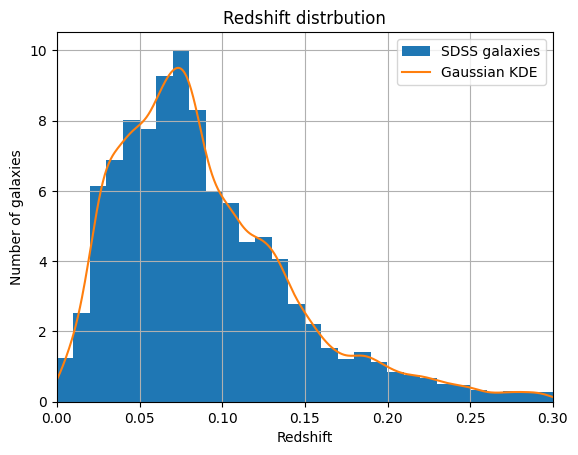

In [7]:
# redshift distribution

fig, ax = plt.subplots()
ax.set_xlim(0, 0.3)
gal.z.plot.hist(bins= 30, density=True, ax=ax, label="SDSS galaxies")
gal.z.plot.kde(ax=ax, label="Gaussian KDE")
y = np.histogram(gal.z, bins= 30, density=True)
print(y[0])
plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')
plt.title('Redshift distrbution')
plt.grid(True)
plt.legend()
plt.savefig('z_kde.pdf', dpi=100);

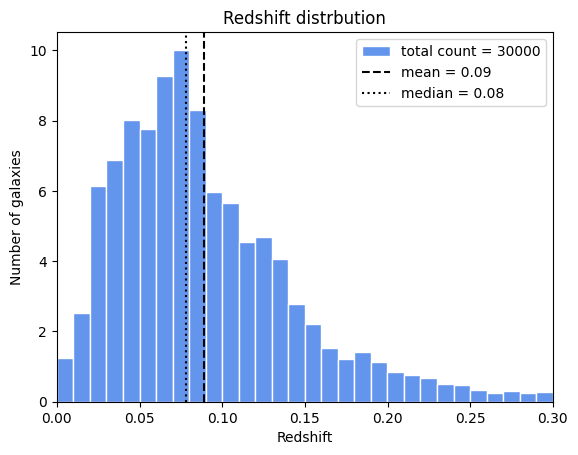

In [8]:
# redshift distribution

fig, ax = plt.subplots()
ax.set_xlim(0, 0.3)
gal.z.plot.hist(bins= 30, color='cornflowerblue', edgecolor='white', density=True, ax=ax, label=f"total count = {len(gal)}")
plt.axvline(np.mean(gal.z), linestyle='--', c='k', label=f"mean = {np.mean(gal.z):.2f}")
plt.axvline(np.median(gal.z), linestyle=':', c='k', label=f"median = {np.median(gal.z):.2f}")
plt.xlabel('Redshift')
plt.ylabel('Number of galaxies')
plt.title('Redshift distrbution')
plt.grid(False)
plt.legend()
plt.savefig('z_dist.pdf', dpi=100);

In [9]:
# class distribution

gal['class'].value_counts()

b'GALAXY'    29794
b'QSO'         206
Name: class, dtype: int64

In [10]:
# subclass distribution

gal['subclass'].value_counts()

b'STARFORMING'              18155
b'STARBURST'                 7775
b''                          2005
b'AGN'                       1543
b'BROADLINE'                  259
b'AGN BROADLINE'              133
b'STARBURST BROADLINE'         83
b'STARFORMING BROADLINE'       47
Name: subclass, dtype: int64

### BPT diagrams

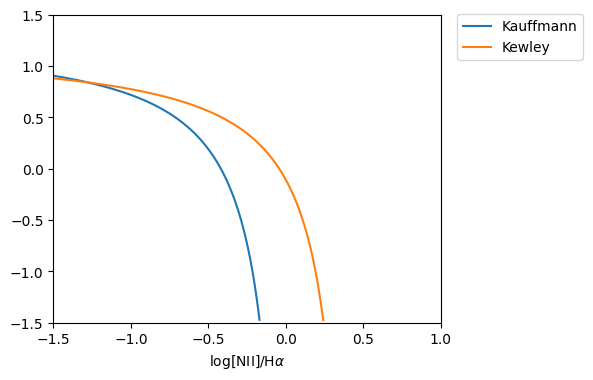

In [11]:
# Let's examine BPT division lines from papers:
# Kewley et al. (2001), ApJ 556, 121 - https://ui.adsabs.harvard.edu/abs/2001ApJ...556..121K/abstract
# Kauffman et al. (2003), MNRAS 346, 1055 - https://ui.adsabs.harvard.edu/abs/2003MNRAS.346.1055K/abstract

x = np.linspace(-1.5, 1.1, 1000)
y_kauffmann = 0.61/(x-0.05) + 1.3 #Kauffman et al. (2003), MNRAS 346, 1055
y_kewley = 0.61/(x-0.47) + 1.19 #Kewley et al. (2001), ApJ 556, 121


# division lines as a function to make it single valued in our limits

def kauffman(x):
    ## x lim was calculated for a y of -1.5
    return [0.61/(i-0.05) + 1.3 if (i < (0.61/(-1.5-1.3))+0.05) else -np.inf for i in x] 

def kewley(x):
   ## x lim was calculated for a y of -1.5 
   return [0.61/(i-0.47) + 1.19 if (i < (0.61/(-1.5-1.19))+0.47) else -np.inf for i in x] 



plt.figure(figsize=(5, 4)) 

fig.suptitle("BPT division lines")

plt.plot(x, kauffman(x), label="Kauffmann")
plt.plot(x, kewley(x), label="Kewley")
plt.xlim(-1.5, 1.0)
plt.ylim(-1.5, 1.5)
plt.xlabel(r"log[NII]/H$\alpha$")
plt.tick_params(direction='out')


plt.legend(bbox_to_anchor=(1.025,1.025), loc='upper left')
fig.tight_layout()
fig.savefig('bpt_division.pdf', dpi=100);

In [12]:
# Let's perfom BPT classification on our sample
# SFG = star-forming galaxy (normal galaxy)
# QSO = quasar (active galaxy, AGN = active galactic nuceli)
# composite = occupying arrea between the empirical (Kauffmann) curves and theortical (Kewly) 

def bpt_classifier(df):
    df['x_BPT'] = np.log10(df['nii_6584_flux']/df['h_alpha_flux'])
    df['y_BPT'] = np.log10(df['oiii_5007_flux']/df['h_beta_flux'])
    df['class_Kauffmann'] = np.where((df['y_BPT'] <= kauffman(df['x_BPT'])), "SFG", "QSO")
    df['class_Kewley'] = np.where((df['y_BPT'] <= kewley(df['x_BPT'])), "SFG", "QSO")
    df['class_BPT'] = np.where(((df['class_Kauffmann']=='SFG')&(df['class_Kewley']=='SFG')), "SFG", 
                                    np.where(((df['class_Kauffmann']=='QSO')&(df['class_Kewley']=='QSO')), "AGN", 
                                            "composite"))
    return df

def bpt_plt(df):

    fig = plt.figure(figsize=(7, 7))

    x = df['x_BPT']
    y = df['y_BPT']
    xy = np.vstack([x,y])
    df["kde"] = gaussian_kde(xy)(xy) #scatter plot colored by density using gaussian_kde

    class_dict = {'SFG': plt.cm.Blues, 
                  'composite': plt.cm.Greens, 
                  'AGN': plt.cm.Oranges
                  }
    
    for class_gal in class_dict.keys():
        df_sub = df[df['class_BPT'] == class_gal]
        x_sub = df_sub['x_BPT']
        y_sub = df_sub['y_BPT']
        z_sub = df_sub['kde']
        normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
        plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                    cmap=class_dict[class_gal], norm=normalize)
    
    x = np.linspace(np.min(df['x_BPT']),np.max( df['x_BPT']), 1000)
    
    plt.plot(x, kauffman(x), 'k--', label="Kauffmann")
    plt.plot(x, kewley(x), 'k:', label="Kewley")

    scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
    scatter2 = plt.scatter([], [], c='green', label="composite")
    scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
    plt.title('BPT diagram')
    plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
              loc='lower left', title="BPT classification", fontsize='medium')
    plt.xlabel(r"log [NII]$\lambda$6584/H$\alpha$", fontsize=12)
    plt.ylabel(r"log [OIII]$\lambda$5007/H$\beta$", fontsize=12)
    plt.xlim(-1.5, 0.6)
    plt.ylim(-1.5, 1.5)
    plt.subplots_adjust(hspace=.0)
    
    return fig

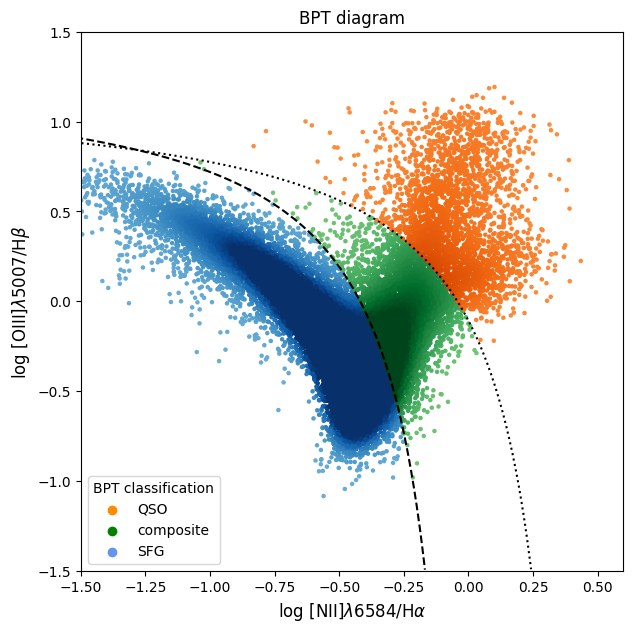

In [13]:
fig = bpt_plt(bpt_classifier(gal))
fig.savefig('bpt_classic.pdf', dpi=100);

In [14]:
# What about 100k points? This will take 10+ minutes to plot on a regular computer.

# Let's try together an alternative approach based on: 
# https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density

# HOMEWORK 2



### WHAN diagram

In [15]:
# WHAN classification based on line equivalent width (EQW)
# Cid Fernandes, R. et al. 2011, MNRAS, 413, 1687 - https://ui.adsabs.harvard.edu/abs/2011MNRAS.413.1687C/abstract

#Five classes of galaxies are identified within the WHAN diagram:
# - pure star-forming galaxies: log([NII]/Hα) < -0.4 and WHα > 3 Å; SFG = starforming galaxies;
# - strong AGN (i.e. Seyferts): log([NII]/Hα) > -0.4 and WHα > 6 Å; AGN=Seyfert;
# - weak AGN: log([NII]/Hα) > -0.4 and WHα between 3 and 6 Å; wAGN=LINERS;
# - retired galaxies (i.e. fake AGN): WHα < 3 Å; RG;
# - passive galaxies (actually, lineless galaxies): WHα and W[N ii] < 0.5 Å.


# lineless = galaxies without emission lines (uncertain)
# ELG = Emission line galaxies (both AGN and SFG)
# QSO = AGN =[Seyfert, LINER] - where Seyfert and LINER are different subtypes of AGN/QSO


gal = bpt_classifier(gal)

gal['y_WHAN'] = np.abs(gal['h_alpha_eqw'])
gal['z_WHAN'] = np.abs(gal['nii_6584_eqw'])

gal['group_WHAN'] = np.where(((gal['z_WHAN']>0.5) & (gal['y_WHAN']>0.5)), "ELG", "lineless")

for i in gal.index:
    if gal.loc[i, 'y_WHAN'] > 0.5:
        if gal.loc[i, 'group_WHAN'] != "lineless":
            if gal.loc[i, 'y_WHAN'] > 3:
                if gal.loc[i, 'x_BPT'] > -0.4:
                    if gal.loc[i, 'y_WHAN'] > 6:
                        gal.loc[i, 'subclass_WHAN'] = "Seyfert"
                        gal.loc[i, 'class_WHAN'] = "AGN"
                    else:
                        gal.loc[i, 'subclass_WHAN'] = "wAGN"
                        gal.loc[i, 'class_WHAN'] = "LINER"
                else:
                    gal.loc[i, 'subclass_WHAN'] = "SFG" 
                    gal.loc[i, 'class_WHAN'] = "SFG"           
            else:
                gal.loc[i, 'subclass_WHAN'] = "RG"
                gal.loc[i, 'class_WHAN'] = "LINER"
        else:
            gal.loc[i, 'subclass_WHAN'] = "uncertain"
            gal.loc[i, 'class_WHAN'] = "uncertain"
    else:
        gal.loc[i, 'subclass_WHAN'] = "passive"

In [16]:
gal['group_WHAN'].value_counts()

ELG         29979
lineless       21
Name: group_WHAN, dtype: int64

In [17]:
gal['class_WHAN'].value_counts()

SFG          19674
AGN           8142
LINER         2163
uncertain       21
Name: class_WHAN, dtype: int64

In [18]:
gal['subclass_WHAN'].value_counts()

SFG          19674
Seyfert       8142
wAGN          1250
RG             913
uncertain       21
Name: subclass_WHAN, dtype: int64

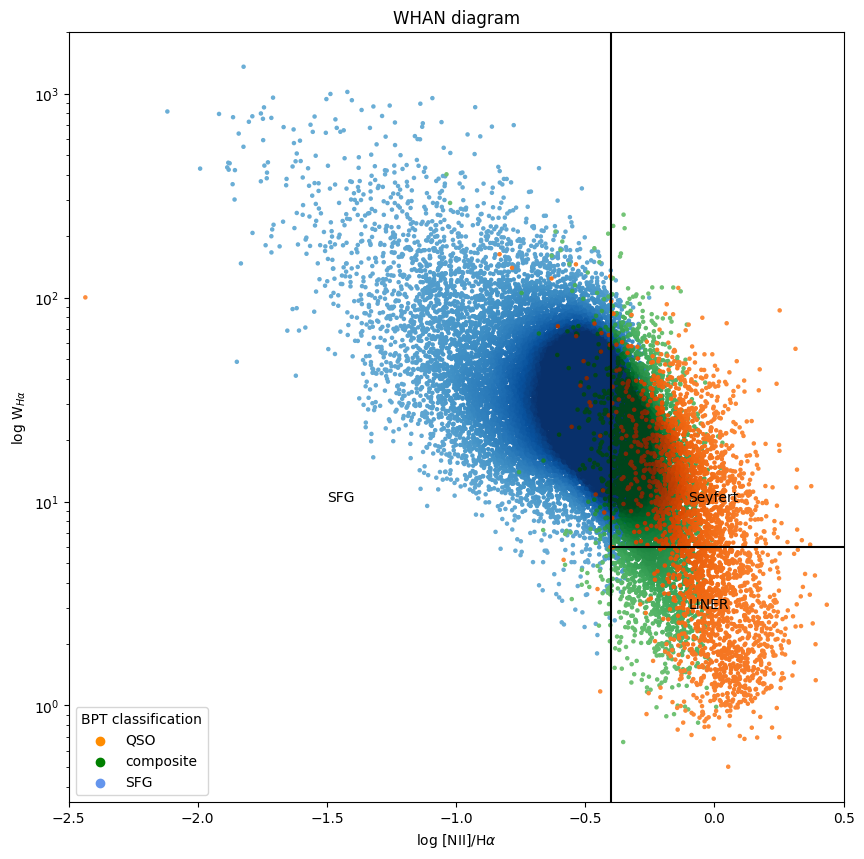

In [19]:
# WHAN diagram

df = gal
x = df['x_BPT']
y = np.log10(df['y_WHAN'])
xy = np.vstack([x,y])
df['kde'] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
              'composite': plt.cm.Greens, 
              'AGN': plt.cm.Oranges
              }
fig = plt.figure(figsize=(10, 10))
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['x_BPT']
    y_sub = df_sub['y_WHAN']
    z_sub = df_sub['kde']
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)


plt.axvline(x=-0.4, color='black')
plt.hlines(y=6, xmin=-0.4, xmax=0.5, color='black')
plt.annotate('Seyfert', xy=(-0.1,10), color='black')
plt.annotate('LINER', xy=(-0.1,3), color='black')
plt.annotate('SFG', xy=(-1.5,10), color='black')
plt.yscale('log')
plt.xlim(-2.5,0.5)

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter2 = plt.scatter([], [], c='green', label="composite")
scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
            loc='lower left', title="BPT classification", fontsize='medium')

plt.xlabel(r"log [NII]/H$\alpha$")
plt.ylabel(r"log W$_{H\alpha}$")
plt.title("WHAN diagram")
plt.savefig('whan.pdf', dpi=100);

In [20]:
gal[(gal.class_WHAN =='uncertain')]

,plate,mjd,fiberid,class,subclass,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,y_BPT,class_Kauffmann,class_Kewley,class_BPT,kde,y_WHAN,z_WHAN,group_WHAN,subclass_WHAN,class_WHAN
100,287,52023,567,b'GALAXY',b'STARFORMING',0.099693,78.88706,23.377500,19.113470,32.144480,...,-0.087459,SFG,SFG,SFG,0.143556,4.926963,0.465845,lineless,uncertain,uncertain
895,488,51914,523,b'GALAXY',b'STARFORMING',0.037512,130.59760,31.093540,14.212180,37.731460,...,-0.340009,SFG,SFG,SFG,0.985456,14.049890,0.165580,lineless,uncertain,uncertain
910,491,51942,624,b'GALAXY',b'',0.054337,34.68065,8.036388,12.454110,9.072287,...,0.190252,SFG,SFG,SFG,0.005361,2.495270,0.389979,lineless,uncertain,uncertain
2140,859,52317,633,b'GALAXY',b'STARFORMING',0.076666,132.82940,30.748590,13.696170,53.948800,...,-0.351226,SFG,SFG,SFG,0.413895,6.930612,0.290023,lineless,uncertain,uncertain
10940,805,52586,499,b'GALAXY',b'STARFORMING',0.100271,178.28140,53.160460,110.047300,23.351930,...,0.315991,SFG,SFG,SFG,0.427766,35.892910,0.013080,lineless,uncertain,uncertain
11768,952,52409,157,b'GALAXY',b'STARFORMING',0.030071,34.63910,13.990160,9.024547,5.162328,...,-0.190397,SFG,SFG,SFG,0.179330,13.231530,0.243708,lineless,uncertain,uncertain
11838,437,51876,37,b'GALAXY',b'STARFORMING',0.100402,127.22520,25.049270,9.221747,39.247150,...,-0.433982,SFG,SFG,SFG,2.295385,17.923710,0.346736,lineless,uncertain,uncertain
12452,743,52262,26,b'GALAXY',b'STARFORMING',0.115075,145.57690,30.541240,12.545770,54.241740,...,-0.386389,SFG,SFG,SFG,3.132679,33.865590,0.353655,lineless,uncertain,uncertain
12631,473,51929,64,b'GALAXY',b'',0.017460,66.66611,39.411380,52.929440,75.400340,...,0.128076,QSO,QSO,AGN,0.002517,0.500684,0.349799,lineless,uncertain,uncertain
16362,1036,52582,426,b'GALAXY',b'STARFORMING',0.037123,50.40337,16.877980,14.041100,11.515130,...,-0.079919,SFG,SFG,SFG,0.835644,17.709900,0.463656,lineless,uncertain,uncertain


In [21]:
gal[(gal.class_BPT =='AGN') & (gal.class_WHAN=='SFG') & (gal.x_BPT<-2)]

,plate,mjd,fiberid,class,subclass,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,...,y_BPT,class_Kauffmann,class_Kewley,class_BPT,kde,y_WHAN,z_WHAN,group_WHAN,subclass_WHAN,class_WHAN
4260,337,51997,97,b'GALAXY',b'STARBURST',0.022723,1352901.0,25035.06,640257.3,4968.048,...,1.407806,QSO,QSO,AGN,0.002009,100.2064,78.2348,ELG,SFG,SFG


In [22]:
print(f"SFG in BPT: {gal[(gal.class_BPT =='SFG')].count()[0]/len(gal) * 100} %"+
      f"\nSFG in WHAN: {gal[(gal.class_WHAN=='SFG')].count()[0]/len(gal) * 100} %")

SFG in BPT: 74.94333333333333 %
SFG in WHAN: 65.58 %


In [23]:
print(f"Composite in BPT, SFG in WHAN: {gal[(gal.class_BPT =='composite') & (gal.class_WHAN=='SFG')].count()[0]/len(gal) * 100} %"+
      f"\nAGN in BPT, SFG in WHAN: {gal[(gal.class_BPT =='AGN') & (gal.class_WHAN=='SFG')].count()[0]/len(gal) * 100} %")

Composite in BPT, SFG in WHAN: 0.58 %
AGN in BPT, SFG in WHAN: 0.09 %


In [24]:
print(f"AGN in BPT: {gal[(gal.class_BPT =='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nAGN in WHAN: {gal[(gal.class_WHAN=='AGN')|(gal.class_WHAN=='LINER')].count()[0]/len(gal) * 100} %")

AGN in BPT: 8.896666666666667 %
AGN in WHAN: 34.35 %


In [25]:
print(f"AGN in BPT: {gal[(gal.class_BPT =='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nStrong AGN in WHAN: {gal[(gal.class_WHAN=='AGN')].count()[0]/len(gal) * 100} %")

AGN in BPT: 8.896666666666667 %
Strong AGN in WHAN: 27.139999999999997 %


In [26]:
print(f"AGN in BPT: {gal[(gal.class_BPT =='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nLINER (wAGN & RG) in WHAN: {gal[(gal.class_WHAN=='LINER')].count()[0]/len(gal) * 100} %")

AGN in BPT: 8.896666666666667 %
LINER (wAGN & RG) in WHAN: 7.21 %


In [27]:
print(f"AGN in BPT and WHAN: {gal[(gal.class_BPT =='AGN') & (gal.class_WHAN =='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nAGN in BPT but not WHAN: {gal[(gal.class_BPT =='AGN') & (gal.class_WHAN !='AGN')].count()[0]/len(gal) * 100} %"+
      f"\nAGN in WHAN but not BPT: {gal[(gal.class_BPT !='AGN') & (gal.class_WHAN =='AGN')].count()[0]/len(gal) * 100} %")

AGN in BPT and WHAN: 4.996666666666667 %
AGN in BPT but not WHAN: 3.9 %
AGN in WHAN but not BPT: 22.143333333333334 %


## TASK 2 - Colour-colour diagram (MIR)

In [28]:
# sdss query through astropy
# REC = alpha, DEC = delta (coordinates in equatorial cooridante system)
# cone search of sdss and wise data, based on radius size = 3 arcsec

with open('query_task2.txt', 'r') as file:
    query = file.read().replace('\n', ' ') ## input is a single string

results_cross = SDSS.query_sql(query, timeout=500, data_release=18).to_pandas()

results_cross.to_csv('nlr_cross.csv', sep=',')

/home/damir/.local/lib/python3.10/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [29]:
# merging of sdss query1 with the wise query2 based on SDSS "address" (plate, mjd, fiberid)

gal_mir = pd.read_csv('nlr_cross.csv', sep=',', index_col=0)
gal_mir = pd.merge(gal_mir, gal, on=['plate', 'mjd', 'fiberid'])
gal_mir = bpt_classifier(gal_mir)
gal_mir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22934 entries, 0 to 22933
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   plate            22934 non-null  int64  
 1   mjd              22934 non-null  int64  
 2   fiberid          22934 non-null  int64  
 3   z_x              22934 non-null  float64
 4   subclass_x       22934 non-null  object 
 5   e_bv_sfd         22934 non-null  float64
 6   w1mpro           22934 non-null  float64
 7   w2mpro           22934 non-null  float64
 8   w3mpro           22934 non-null  float64
 9   w1flux           22934 non-null  float64
 10  w2flux           22934 non-null  float64
 11  w3flux           22934 non-null  float64
 12  class            22934 non-null  object 
 13  subclass_y       22934 non-null  object 
 14  z_y              22934 non-null  float64
 15  h_alpha_flux     22934 non-null  float64
 16  h_beta_flux      22934 non-null  float64
 17  oiii_5007_fl

In [30]:
gal_mir

,plate,mjd,fiberid,z_x,subclass_x,e_bv_sfd,w1mpro,w2mpro,w3mpro,w1flux,...,y_BPT,class_Kauffmann,class_Kewley,class_BPT,kde,y_WHAN,z_WHAN,group_WHAN,subclass_WHAN,class_WHAN
0,385,51877,73,0.186553,b'STARBURST',0.034870,15.545,15.016,10.863,95.980,...,-0.429834,SFG,SFG,SFG,3.563095,33.34644,9.995242,ELG,SFG,SFG
1,385,51783,343,0.226439,b'STARBURST',0.034479,15.608,15.247,11.301,90.535,...,-0.190793,SFG,SFG,SFG,1.759953,51.13211,14.754950,ELG,SFG,SFG
2,385,51877,576,0.060276,b'STARFORMING',0.034300,14.055,13.939,10.148,378.580,...,-0.465911,SFG,SFG,SFG,3.254022,19.80542,7.204308,ELG,SFG,SFG
3,386,51788,183,0.055113,b'STARBURST',0.028169,14.705,14.532,11.034,207.970,...,0.007499,SFG,SFG,SFG,0.991118,49.77634,11.053380,ELG,SFG,SFG
4,386,51788,592,0.113498,b'',0.041179,14.919,14.614,10.841,170.800,...,-0.119492,SFG,SFG,SFG,3.729683,31.23405,10.381110,ELG,SFG,SFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22929,314,51641,79,0.061739,b'STARBURST',0.077298,14.593,14.557,10.719,230.500,...,-0.643070,SFG,SFG,SFG,2.368759,41.29825,15.499020,ELG,SFG,SFG
22930,314,51641,375,0.060309,b'STARFORMING',0.050819,14.177,14.002,10.337,338.090,...,-0.350027,SFG,SFG,SFG,3.301515,23.83140,7.525884,ELG,SFG,SFG
22931,314,51641,535,0.029979,b'STARFORMING',0.056245,14.038,13.979,10.774,384.310,...,-0.393504,SFG,SFG,SFG,1.430655,13.20853,4.296946,ELG,SFG,SFG
22932,315,51663,176,0.077926,b'STARBURST',0.105488,14.539,14.135,9.802,242.410,...,0.061118,SFG,SFG,SFG,0.202373,120.99180,26.781040,ELG,SFG,SFG


In [31]:
# Extinction correction (necessary data processing step)

R_w1w2 = 0.056 ## source: https://arxiv.org/abs/2210.15918
R_w2w3 = -0.045

gal_mir['w1-w2'] = gal_mir['w1mpro'] - gal_mir['w2mpro'] - (R_w1w2 * gal_mir['e_bv_sfd'])
gal_mir['w2-w3'] = gal_mir['w2mpro'] - gal_mir['w3mpro'] - (R_w2w3 * gal_mir['e_bv_sfd'])

gal_mir['x_mat'] = np.log10(gal_mir['w3flux']/gal_mir['w2flux'])
gal_mir['y_mat'] = np.log10(gal_mir['w2flux']/gal_mir['w1flux'])

In [32]:
# WISE classification
# Assef et al. 2013 - https://ui.adsabs.harvard.edu/abs/2013ApJ...772...26A/abstract
# AGN criterion -->  W1 – W2 = 0.8 
# (plus few others for different types of galaxies: Spheroids, Intermediate disks, Starforming disks)

gal_mir['class_WISE'] = np.where((gal_mir['w1-w2'] >= 0.8), 'AGN', 
                                 (np.where((gal_mir['w2-w3'] <= 2), 'Spheroids', 
                                           (np.where(((gal_mir['w2-w3'] <= 3.5) & (gal_mir['w2-w3'] > 2)), 'Intermediate disks', 
                                                     (np.where((gal_mir['w2-w3'] > 3.5), 'SF disks', '')))))))

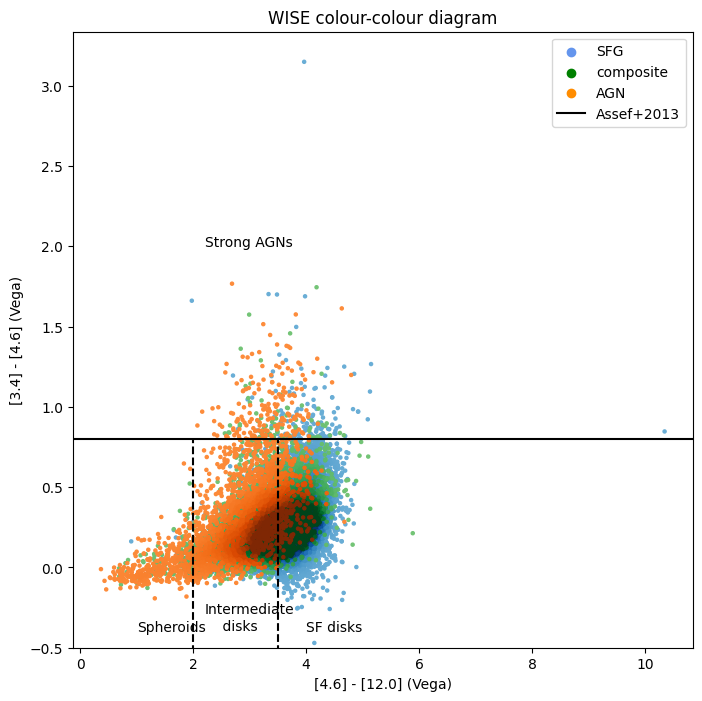

In [33]:
# WISE colour-colour plot

df = gal_mir
x = df['w2-w3']
y = df['w1-w2']
xy = np.vstack([x,y])
df['kde'] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
              'composite': plt.cm.Greens, 
              'AGN': plt.cm.Oranges
              }

fig = plt.figure(figsize=(8, 8))
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['w2-w3']
    y_sub = df_sub['w1-w2']
    z_sub = df_sub["kde"]
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter2 = plt.scatter([], [], c='green', label="composite")
scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
            loc='upper left', title="BPT classification", fontsize='medium')

plt.axhline(y=0.8, c='k', label="Assef+2013")
plt.vlines(x=2, ymin=-0.6, ymax=0.8, colors='k', linestyle='--')
plt.vlines(x=3.5, ymin=-0.6, ymax=0.8, colors='k', linestyle='--')
plt.annotate('Strong AGNs', xy=(2.2,2), color='black')
plt.annotate('Spheroids', xy=(1,-0.4), color='black')
plt.annotate('Intermediate\n    disks', xy=(2.2,-0.39), color='black')
plt.annotate('SF disks', xy=(4,-0.4), color='black')
plt.ylim(bottom=-0.5)

plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram")

plt.legend()
plt.savefig('wise_cc.pdf', dpi=100);

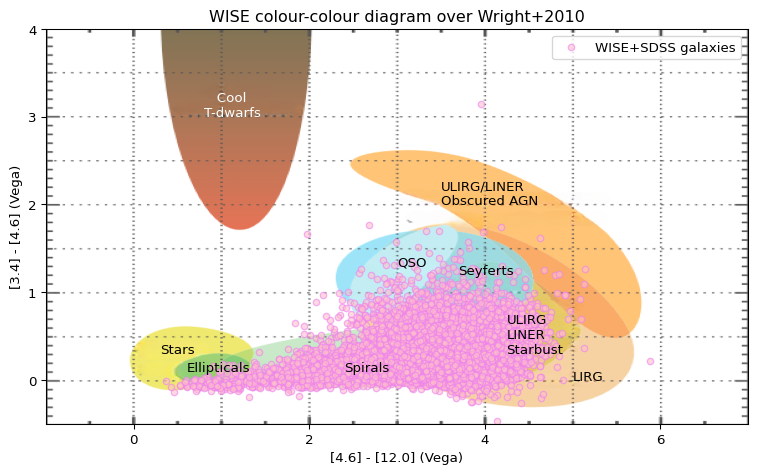

In [34]:
# Color-color plot over Wright+2010

fig = plt.figure(figsize=(566*2/120, 622*2/120), dpi=96)

img = plt.imread('wright+2010_cleanup.png')
plt.imshow(img, zorder=0, extent=[-1.009, 7, -0.510, 4], alpha=0.75, aspect='equal')

plt.scatter(gal_mir['w2-w3'], gal_mir['w1-w2'],  color='pink', edgecolors='violet', marker='.', alpha=0.6, s=90, zorder=1, label='WISE+SDSS galaxies')
plt.annotate('   Cool\nT-dwarfs', xy=(0.8,3), color='white')
plt.annotate('Ellipticals', xy=(0.6,0.1), color='black')
plt.annotate('Stars', xy=(0.3,0.3), color='black')
plt.annotate('Spirals', xy=(2.4,0.1), color='black')
plt.annotate('QSO', xy=(3,1.3), color='black')
plt.annotate('Seyferts', xy=(3.7,1.2), color='black')
plt.annotate('ULIRG\nLINER\nStarbust', xy=(4.25,0.3), color='black')
plt.annotate('LIRG', xy=(5,0), color='black')
plt.annotate('ULIRG/LINER\nObscured AGN', xy=(3.5,2), color='black')

plt.xlim(-1,7)
plt.xticks(np.arange(0, 7, 2))
plt.yticks(np.arange(0, 5, 1))
plt.ylim(-0.5,4)

plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram over Wright+2010")

plt.legend()
plt.savefig('wise_wright+2010.pdf', dpi=100);

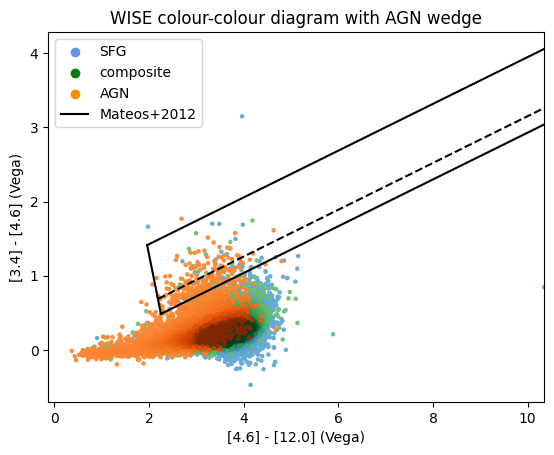

In [35]:
# c-c plot with AGN wedge Matteos+2012
# https://ui.adsabs.harvard.edu/abs/2012MNRAS.426.3271M/abstract

df = gal_mir
x = df['w2-w3']
y = df['w1-w2']
xy = np.vstack([x,y])
df['kde'] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
              'composite': plt.cm.Greens, 
              'AGN': plt.cm.Oranges
              }
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['w2-w3']
    y_sub = df_sub['w1-w2']
    z_sub = df_sub['kde']
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

scatter1 = plt.scatter([], [], c='cornflowerblue', label="SFG")
scatter2 = plt.scatter([], [], c='green', label="composite")
scatter3 = plt.scatter([], [], c='darkorange', label="AGN")
plt.legend((scatter3, scatter2, scatter1), ["QSO", "composite", "SFG"], 
            loc='upper left', title="BPT classification", fontsize='medium')

def y_cen(x): return [0.315*i for i in x]
def y_top(x): return [0.315*i+0.796 for i in x]
def y_bot(x): return [0.315*i-0.222 for i in x]
def y_lim(x): return [-3.172*i+7.624 for i in x]

x_cen = (7.624)/(0.315+3.172)
x_top = (7.624-0.796)/(0.315+3.172)
x_bot = (7.624+0.222)/(0.315+3.172)
def x_range(x_pos): return np.linspace(x_pos, np.max(df['w2-w3']), 100)
x_lim = np.linspace(x_top, x_bot, 100)

plt.plot(x_range(x_cen), y_cen(x_range(x_cen)), 'k--')
plt.plot(x_range(x_top), y_top(x_range(x_top)), 'k-', label='Mateos+2012')
plt.plot(x_range(x_bot), y_bot(x_range(x_bot)), 'k-')
plt.plot(x_lim, y_lim(x_lim), 'k-')
plt.xlim(right=np.max(df['w2-w3']))

plt.legend()
plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram with AGN wedge")
plt.savefig("wise_wedge.pdf", dpi=100);

In [36]:
# WHAN classification
x_top = (7.624-0.796)/(0.315+3.172)
x_bot = (7.624+0.222)/(0.315+3.172)

def y_top(x): return 0.315*x+0.796 if x>=x_top else -np.inf
def y_bot(x): return 0.315*x-0.222 if x>=x_bot else -np.inf
def y_lim(x): return -3.172*x+7.624 if x>=x_top and x<=x_bot else -np.inf

for i, x, y in zip(gal_mir.index, gal_mir['w2-w3'], gal_mir['w1-w2']):
    if y <= y_top(x) and y > y_lim(x) and y > y_bot(x):
        gal_mir.loc[i, 'class_Mateos'] = "AGN"
    else:
        gal_mir.loc[i, 'class_Mateos'] = "other"
        
gal_mir['class_Mateos'].value_counts()

other    22637
AGN        297
Name: class_Mateos, dtype: int64

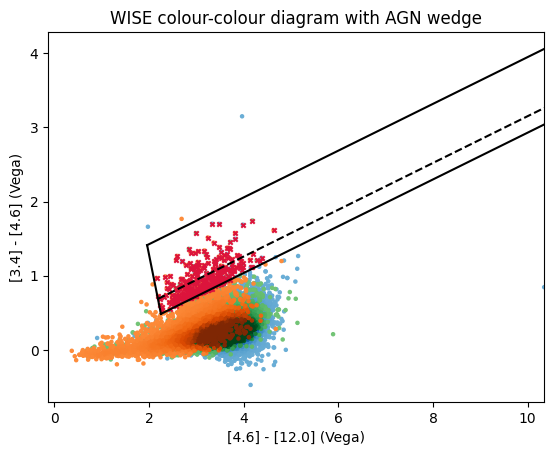

In [37]:
# Colour-colour plot with AGN wedge Matteos+2012 checking classification is right
# https://ui.adsabs.harvard.edu/abs/2012MNRAS.426.3271M/abstract

df = gal_mir
x = df['w2-w3']
y = df['w1-w2']
xy = np.vstack([x,y])
df['kde'] = gaussian_kde(xy)(xy)

class_dict = {'SFG': plt.cm.Blues, 
              'composite': plt.cm.Greens, 
              'AGN': plt.cm.Oranges
              }
    
for class_gal in class_dict.keys():
    df_sub = df[df['class_BPT'] == class_gal]
    x_sub = df_sub['w2-w3']
    y_sub = df_sub['w1-w2']
    z_sub = df_sub['kde']
    normalize = matplotlib.colors.Normalize(vmin=-1, vmax=1)
    plt.scatter(x_sub, y_sub, c=z_sub, s=5, edgecolor=None,
                cmap=class_dict[class_gal], norm=normalize)

df_sub = df[df['class_Mateos'] == 'AGN']
plt.scatter(df_sub['w2-w3'], df_sub['w1-w2'],  color='crimson', marker='x', s=10, zorder=1)

def y_cen(x): return [0.315*i for i in x]
def y_top(x): return [0.315*i+0.796 for i in x]
def y_bot(x): return [0.315*i-0.222 for i in x]
def y_lim(x): return [-3.172*i+7.624 for i in x]

x_cen = (7.624)/(0.315+3.172)
x_top = (7.624-0.796)/(0.315+3.172)
x_bot = (7.624+0.222)/(0.315+3.172)
def x_range(x_pos): return np.linspace(x_pos, np.max(df['w2-w3']), 100)
x_lim = np.linspace(x_top, x_bot, 100)

plt.plot(x_range(x_cen), y_cen(x_range(x_cen)), 'k--')
plt.plot(x_range(x_top), y_top(x_range(x_top)), 'k-')
plt.plot(x_range(x_bot), y_bot(x_range(x_bot)), 'k-')
plt.plot(x_lim, y_lim(x_lim), 'k-')
plt.xlim(right=np.max(df['w2-w3']))

plt.xlabel("[4.6] - [12.0] (Vega)")
plt.ylabel("[3.4] - [4.6] (Vega)")
plt.title("WISE colour-colour diagram with AGN wedge");

In [38]:
print(f"AGN in BPT: {gal_mir[(gal_mir.class_BPT =='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in WISE: {gal_mir[(gal_mir.class_WISE =='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in Mateos: {gal_mir[(gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")

AGN in BPT: 9.915409435772215 %
AGN in WISE: 1.6830906078311676 %
AGN in Mateos: 1.2950204935903027 %


In [39]:
print(f"AGN in BPT and WISE: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_WISE =='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in BPT but not WISE: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_WISE !='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in WISE but not BPT: {gal_mir[(gal_mir.class_BPT !='AGN') & (gal_mir.class_WISE =='AGN')].count()[0]/len(gal_mir) * 100} %")

AGN in BPT and WISE: 0.8153832737420423 %
AGN in BPT but not WISE: 9.100026162030174 %
AGN in WISE but not BPT: 0.8677073340891253 %


In [40]:
print(f"AGN in BPT and Mateos: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in BPT but not Mateos: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_Mateos !='AGN')].count()[0]/len(gal_mir) * 100} %"+
      f"\nAGN in Mateos but not BPT: {gal_mir[(gal_mir.class_BPT !='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")

AGN in BPT and Mateos: 0.9025900409871807 %
AGN in BPT but not Mateos: 9.012819394785035 %
AGN in Mateos but not BPT: 0.39243045260312204 %


In [41]:
print(f"AGN in BPT, WISE and Mateos: {gal_mir[(gal_mir.class_BPT =='AGN') & (gal_mir.class_WISE =='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")

AGN in BPT, WISE and Mateos: 0.6584110927007936 %


In [42]:
print(f"\nAGN in WISE and Mateos: {gal_mir[(gal_mir.class_WISE =='AGN') & (gal_mir.class_Mateos =='AGN')].count()[0]/len(gal_mir) * 100} %")


AGN in WISE and Mateos: 0.981076131507805 %


## END